# 빅데이터개론2  과제 3

**제출기한 : 2022년 10월 27일 23시 59분**

각 문제를 읽고 주어진 코드셀에 제시된 변수에 결과를 입력하거나, 주어진 텍스트셀에 프로그램 코드 또는 답안을 입력하여 제출하세요.  


아래는 필요한 라이브러리를 불러오는 코드셀입니다. 반드시 숙제를 시작할 때 먼저 실행시키고 문제에서 적절하게 이용하세요.


In [1]:
# 한글 폰트가 깨질 때 사용 - 런타임 메뉴에서 다시 시작 및 모두 실행 선택. (출처: https://teddylee777.github.io/colab/colab-korean)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

plt.rc('font', family='NanumBarunGothic') # clolab 에서 한글 사용 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,5)

In [3]:
import math
import numpy as np
import pandas as pd
from itertools import product

**다음은 과제의 수행과 제출에 대한 안내입니다.**

- 빅데이터개론2 과제는 모두 Colab의 공유 기능을 이용하여 제출하게 됩니다. 자세한 제출방법은 강의시간(또는 동영상)에 알려줄 것입니다.

- 제출시 노트북의 이름(화일명)에서 성명과 학번을 자신의 이름과 학번으로 바꾼 후에 제출해야 합니다. (예: `빅데이터개론2_2022F_과제-01-홍길동-12345677.ipynb`) 

- 답을 입력하는 셀에 있는 `...`는 지우고 답을 입력하세요.

- **과제 노트북은 답을 제시하는 코드셀이나 텍스트셀 이외의 내용 또는 순서를 변경하지 마세요.**



## 1. 자료의 분포

고속 열차에 탑승한 승객에 대한 자료는 csv(comma-separated values) 형식으로 train-data-01.csv 화일에 저장되어 있다. csv 자료 화일의 각 열에 대한 이름과 설명은 다음과 같다. 자료는 2019년 7월 한 달 동안 출발역, 도착역별로 날마다 각 열차를 이용한 탑승객의 수가 나타나 있다.


- TRAIN_NO: 열차 번호

- DATE : 운행 일자

- STATION_START: 출발역

- STATION_ARRV : 도착역

- NUM_PASSENGER : 탑승객 수

pandas 라이브러리의 read_csv() 함수를 사용하면 csv 화일의 자료를 읽어서 데이터프레임 `train_raw_data` 를 아래와 같이 만들 수 있다.

**열이름이 모두 대문자임을 유의하세요.**




In [4]:
url ="https://ilovedata.github.io/teaching/bigdata2/data/train-data-01.csv"
train_raw_data = pd.read_csv(url)

In [5]:
train_raw_data.tail(10)

,TRAIN_NO,DATE,STATION_DEPART,STATION_ARRV,NUM_PASSENGER
1759,6,20190721,울산,부산,19.0
1760,6,20190722,울산,부산,10.0
1761,6,20190723,울산,부산,7.0
1762,6,20190724,울산,부산,12.0
1763,6,20190725,울산,부산,11.0
1764,6,20190726,울산,부산,10.0
1765,6,20190727,울산,부산,6.0
1766,6,20190728,울산,부산,21.0
1767,6,20190729,울산,부산,12.0
1768,6,20190730,울산,부산,11.0


**문제 1**

데이터프레임 `train_raw_data` 을 이용하여 탑승 인원 수 `NUM_PASSENGER` 에 대한 히스토그램을 작성하는 코드를 다음 코드셀에 작성하시오. 

단, 구간의 개수(`bins`)는 20개로 지정하시오

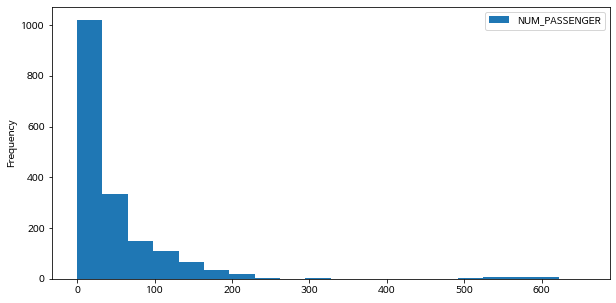

In [6]:
train_raw_data.plot.hist(y='NUM_PASSENGER', bins=20)

**문제 2**

데이터프레임 `train_raw_data` 을 이용하여 탑승 인원 수 `NUM_PASSENGER` 에 대한 상자그림을 작성하는 코드를 다음 코드셀에 작성하시오

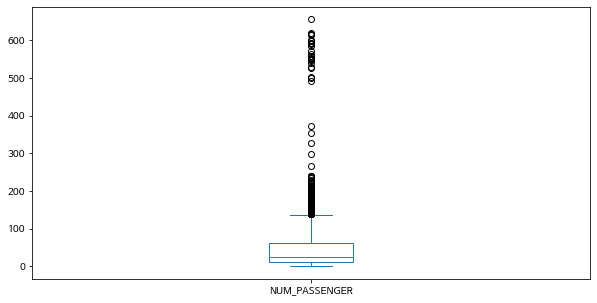

In [7]:
train_raw_data.plot.box(y='NUM_PASSENGER')

**문제 3**

 위의 문제 1 과 2 에서 작성한 히스토그램 참고하여  다음 4개의 항목 중에서 분포에 대한 설명이 적절한 항목을 선택하여 다음 코드셀 `ans3` 에 입력하시오.

7월 한 달 동안 열차가 수송한 각 일별, 열차별, 구간별 모든 자료에서 탑승객 수의 분포는

1. 종처럼 대칭인 분포이다..
2. 오른 쪽으로 꼬리가 긴 분포이다.
3. 왼 쪽으로 꼬리가 긴 분포이다. 
4. 위의 1,2,3 에 해당하지 않는다.

In [8]:
ans3 = 2

**문제 4**

데이터프레임 `train_raw_data` 에서 **출발역이 서울이고, 도착역이 부산인 자료만 선택** 하여 탑승 인원 수 `NUM_PASSENGER` 에 대한 히스토그램과 상자그림을 그려보고 분포에 대한 설명이 적절한 항목을 선택하여 다음 코드셀 `ans4` 에 입력하시오.

7월 한 달 동안 열차가 수송한 각 일별, 열차별, 서울-부산 탑승객 수의 분포는

1. 종처럼 대칭인 분포이다..
2. 오른 쪽으로 꼬리가 긴 분포이다.
3. 왼 쪽으로 꼬리가 긴 분포이다. 
4. 위의 1,2,3 에 해당하지 않는다.

In [9]:
df = train_raw_data.loc[(train_raw_data.STATION_DEPART  == '서울') & (train_raw_data.STATION_ARRV == '부산')]

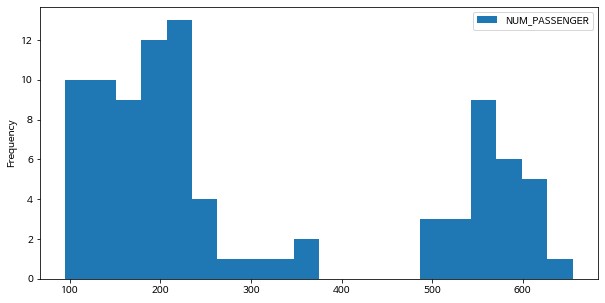

In [10]:
df.plot.hist(y='NUM_PASSENGER', bins=20)

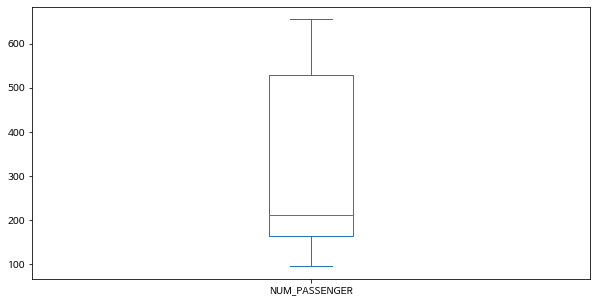

In [11]:
df.plot.box(y='NUM_PASSENGER')

In [12]:
ans4 = 4

**문제 5**

데이터프레임 `train_raw_data` 에서 **출발역이 서울이고, 도착역이 대전인 자료만 선택** 하여 탑승 인원 수 `NUM_PASSENGER` 에 대한 히스토그램과 상자그림을 그려보고 분포에 대한 설명이 적절한 항목을 선택하여 다음 코드셀 `ans5` 에 입력하시오.

7월 한 달 동안 열차가 수송한 각 일별, 열차별, 서울-부산 탑승객 수의 분포는

1. 종처럼 대칭인 분포이다..
2. 오른 쪽으로 꼬리가 긴 분포이다.
3. 왼 쪽으로 꼬리가 긴 분포이다. 
4. 위의 1,2,3 에 해당하지 않는다.

In [13]:
df2 = train_raw_data.loc[(train_raw_data.STATION_DEPART  == '서울') & (train_raw_data.STATION_ARRV == '대전')]

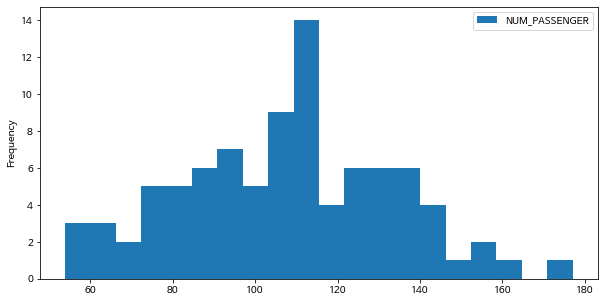

In [14]:
df2.plot.hist(y='NUM_PASSENGER', bins=20)

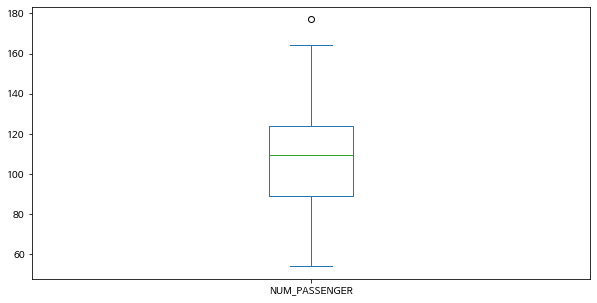

In [15]:
df2.plot.box(y='NUM_PASSENGER')

In [16]:
ans5 = 1

**문제 6**

다음 코드는 7월 한 달 동안 서울에서 출발한 경우만 선택한 데이터프레임 `train_seoul` 을 만드는 코드이다.  


In [17]:
train_seoul = train_raw_data.loc[ train_raw_data.STATION_DEPART == "서울"]

위에서 만든 데이터프레임 `train_seoul` 을 이용하여 7월 한 달 동안 서울에서 출발한 열차가 **정차한 총 횟수 를 도착열별로** 나타내는 파이 차트(pie chart)를 그리는 코드를 아래 코드 셀에 작성하시오.  

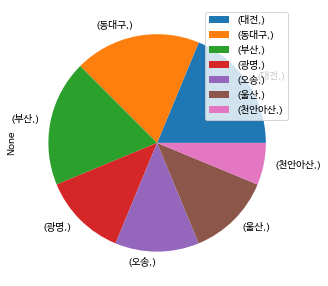

In [18]:
train_seoul[ ["STATION_ARRV"]].value_counts().plot.pie(legend=True)

**문제 7**

7월 한 달 동안 출발역과 도착역별로 **총 탑승객의 수**를 고려할 때 총 탑승객 수가 가장 적은 구간을 다음 항목에서 선택하여 `ans7` 에 입력하시오  

1. 천안아산 ->	대전
2. 행신	-> 서울
3. 천안아산	-> 오송
4. 천안아산	-> 동대구	

In [28]:
df3 = train_raw_data[['STATION_DEPART',	'STATION_ARRV', 'NUM_PASSENGER']].groupby(by =['STATION_DEPART',	'STATION_ARRV']).sum().reset_index()
df3.sort_values(by=['NUM_PASSENGER'])

,STATION_DEPART,STATION_ARRV,NUM_PASSENGER
26,천안아산,오송,127.0
31,행신,서울,260.0
23,천안아산,대전,262.0
18,오송,대전,262.0
24,천안아산,동대구,317.0
5,광명,천안아산,329.0
25,천안아산,부산,368.0
27,천안아산,울산,397.0
11,서울,광명,586.0
3,광명,오송,699.0


In [19]:
ans7 = 3

**문제 8**

7월 한 달 동안 **출발역이 서울이고 도착역이 부산인 자료만 선택하여**  탑승객의 수에 대한 요약 통계량을 구하여 다음 문제의 답을 지정된 코드 셀에 입력하시오  


In [29]:
df4 = train_raw_data.loc[(train_raw_data.STATION_DEPART  == '서울') & (train_raw_data.STATION_ARRV == '부산')]
df4.describe()

,TRAIN_NO,DATE,NUM_PASSENGER
count,90.000000,9.000000e+01,90.000000
mean,4.333333,2.019072e+07,299.833333
std,1.709195,8.703932e+00,184.131319
min,2.000000,2.019070e+07,95.000000
25%,2.000000,2.019071e+07,163.250000
50%,5.000000,2.019072e+07,212.000000
75%,6.000000,2.019072e+07,528.750000
max,6.000000,2.019073e+07,655.000000


In [30]:
IQR = 528.750000 - 163.250000
IQR

365.5

(1) 탑승객의 수의 평균(mean)을 다음 코드 셀의 `ans81` 에 입력하시오.

In [20]:
ans81 = 299.833333

(2) 탑승객의 수의 중앙값(median)을 다음 코드 셀의 `ans82` 에 입력하시오.

In [21]:
ans82 = 212.000000

(3) 탑승객의 수의 IQR 을 다음 코드 셀의 `ans83` 에 입력하시오.

In [22]:
ans83 = 365.5